In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
Company_Data = pd.read_csv('D:/ExcelRassignments/Assignment15/Company_Data(1).csv')
Company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [6]:
company=Company_Data.copy()

In [7]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
company_df=company.drop(['Age','Education'], axis=1)

In [9]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US
0,9.50,138,73,11,276,120,Bad,Yes,Yes
1,11.22,111,48,16,260,83,Good,Yes,Yes
2,10.06,113,35,10,269,80,Medium,Yes,Yes
3,7.40,117,100,4,466,97,Medium,Yes,Yes
4,4.15,141,64,3,340,128,Bad,Yes,No


In [10]:
company_df.shape

(400, 9)

In [11]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Urban        400 non-null    object 
 8   US           400 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 28.2+ KB


In [12]:
company_df[company_df.duplicated()].shape

(0, 9)

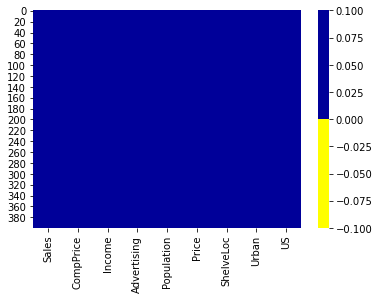

In [14]:
cols = company_df.columns
colours = ['#ffff00', '#000099']
sns.heatmap(company_df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [15]:
company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Urban          0
US             0
dtype: int64

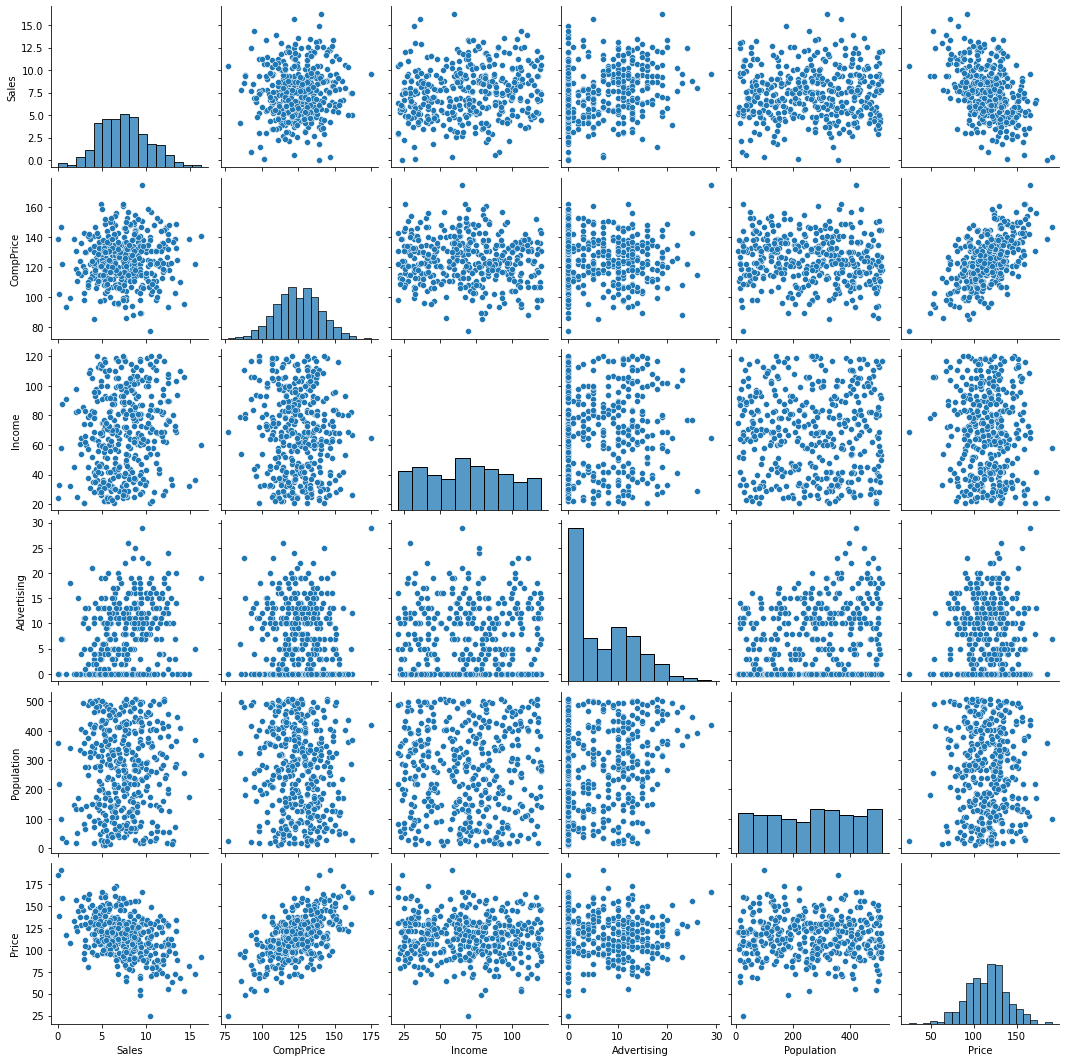

In [17]:
sns.pairplot(company_df)
plt.show()

In [18]:
company_df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000


In [19]:
import sweetviz as sv
sweet_report = sv.analyze(company_df)
sweet_report.show_html('Random_Forest_Company_Data_EDA_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Random_Forest_Company_Data_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
company_df1= company_df.copy()

In [22]:
company_df1.loc[company_df['Sales']>=8, 'sales']="1"  #High=1
company_df1.loc[company_df['Sales']<=8, 'sales']="0"  #Low=0
company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,Yes,No,0


## Label Encoder

In [23]:
labelencoder= LabelEncoder

In [24]:
cols=['ShelveLoc','Urban','US']

In [25]:
company_df1[cols] = company_df1[cols].apply(LabelEncoder().fit_transform)

In [26]:
company_df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban,US,sales
0,9.50,138,73,11,276,120,0,1,1,1
1,11.22,111,48,16,260,83,1,1,1,1
2,10.06,113,35,10,269,80,2,1,1,1
3,7.40,117,100,4,466,97,2,1,1,0
4,4.15,141,64,3,340,128,0,1,0,0


### ShelveLoc => Bad=0, Good=1, Medium=2, Urban => Yes=1, No=0, US => Yes=1, No=0 and Sales => High=1, Low=0

## Random Forest Clssification

In [27]:
X=company_df1.iloc[:,0:8]
Y=company_df1['sales']

num_trees=100
max_features=3
kfold=KFold(n_splits=10, random_state=40, shuffle=True)
model=RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results=cross_val_score(model, X,Y, cv=kfold)

In [30]:
results

array([1.   , 1.   , 0.975, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [31]:
print(results.mean())

0.9974999999999999


## Splitting Data into Training and Testing Dataset

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=40)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts()

0    53
1    27
dtype: int64

In [36]:
y_pred

array(['1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0',
       '0', '0'], dtype=object)

## Confusion Matrix

In [37]:
from sklearn.metrics import classification_report
cm = pd.crosstab(y_test,y_pred)
cm

col_0,0,1
sales,,
0,53,0
1,0,27


## Interpretation 

### 81% data was classified correctly as per Random Forest Model

### As per above analysis CompPrice, Income, Advertising, Population, Price, ShelveLoc, cause for High Sales to the Company